# House Price Prediction Case Study
### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Essentially, the company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Content:
* [Import required libraries](#import-required-libraries)
* [Reading and Understanding the Data](#read-understand-data)
    * [Convert numerical to categorical values](#numerical-to-categorical)
* [Cleaning Data](#data-cleaning)
    * [Delete columns with 90% Null Values](#delete-null-val-columns) 
    * [Delete columns with 85% category weightage](#delete-categorical-columns)
    * [Delete columns with 85% value weightage](#delete-numerical-columns)
    * [Delete Duplicate rows](#delete-duplicate-rows)
    * [Combine categories](#combine-categories)
    * [Create Derived variables](#derived_variables)
* [Impute missing values](#missing-values)
    * [Replace NA with None](#replace-na-with-none)
    * [Replace Null with Mode for categorical columns](#replace-null-with-mode)
    * [Replace Null with Mean/Median for numerical columns](#replace-null-with-mean-median)
* [Remove Outliers](#remove-outliers)
* [Visualising the Data](#visualize_data)
    * [Visualize Target variable](#visualize_target_var)
    * [Visualize Independent vs Target variable](#visualize-predictor-target-var)
    * [Visualize correlation among variables](#visualize-correlation)
* [Data Preparation](#data_preparation)
    * [Create Sequence for Ordered Categorical Variables](#create-sequence)
    * [Create Dummy variable](#dummy-variables)
    * [Create X and y sets for the model building](#create_x_y_sets)
    * [Rescaling Features](#rescaling_features)
    * [Splitting Data into Train and Test Sets](#train_test_set)
* [Building Linear Regression model](#build_linear_model)
* [Building Ridge Regression model](#ridge-model)
* [Building Lasso Regression model](#lasso-model)
* [Conclusion](#conclusion)
* [Assignment](#assignment)
    * [Question 1](#Question1)
    * [Question 1](#Question2)
    * [Question 1](#Question3)

## Step 1: Import required libraries <a class="anchor" id="import-required-libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading and Understanding the Data <a class="anchor" id="read-understand-data"></a>

In [3]:
# Read the dataset train.csv
dataDf = pd.read_csv("train.csv")
dataDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataDf.shape

# Observation
# The dataset contains 1460 rows and 81 columns

(1460, 81)

In [5]:
dataDf.info(verbose=True,show_counts=True)

# Observation
# There are few columns with missing values
# Majority of columns are Categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Find the percentage of null values in each column
pd.set_option('display.max_rows', None)
round(dataDf.isnull().sum() / len(dataDf) * 100, 2)

# Observation
# There are few columns with more than 90% of null value

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

#### Convert numerical values into categorical values for better understanding <a class="anchor" id="numerical-to-categorical"></a>
The Feature variables are
- MSSubClass

In [7]:
# MSSubClass
dataDf['MSSubClass'] = dataDf['MSSubClass'].map({20:'1-STORY 1946 & NEWER', 30:'1-STORY 1945 & OLDER', 40:'1-STORY W/FINISHED', \
                                                45:'1-1/2 STORY UNFINISHED', 50:'1-1/2 STORY FINISHED',60:'2-STORY 1946 & NEWER', \
                                                70:'2-STORY 1945 & OLDER', 75:'2-1/2 STORY ALL AGES', 80:'SPLIT OR MULTI-LEVEL', \
                                                85:'SPLIT FOYER', 90:'DUPLEX', 120:'1-STORY PUD 1946 & NEWER',150:'1-1/2 STORY PUD ALL AGES', \
                                                160:'2-STORY PUD 1946 & NEWER', 180:'PUD MULTILEVEL', 190:'2 FAMILY CONVERSION'})
dataDf['MSSubClass'].value_counts()

1-STORY 1946 & NEWER        536
2-STORY 1946 & NEWER        299
1-1/2 STORY FINISHED        144
1-STORY PUD 1946 & NEWER     87
1-STORY 1945 & OLDER         69
2-STORY PUD 1946 & NEWER     63
2-STORY 1945 & OLDER         60
SPLIT OR MULTI-LEVEL         58
DUPLEX                       52
2 FAMILY CONVERSION          30
SPLIT FOYER                  20
2-1/2 STORY ALL AGES         16
1-1/2 STORY UNFINISHED       12
PUD MULTILEVEL               10
1-STORY W/FINISHED            4
Name: MSSubClass, dtype: int64

## Step 3: Cleaning Data <a class="anchor" id="data-cleaning"></a>

In [8]:
# Drop 'ID' column as it does not add value in prediction
dataDf = dataDf.drop(columns=['Id'])
dataDf.shape

(1460, 80)

#### Delete columns which has 90% of null values <a class="anchor" id="delete-null-val-columns"></a>

In [9]:
# Find the columns which has more than 90% of null value
col_with_90_per_no_value = list(dataDf.columns[dataDf.isnull().sum() / len(dataDf) * 100 > 90])
col_with_90_per_no_value

['Alley', 'PoolQC', 'MiscFeature']

Columns with 90% of null values are actually categorical columns where 'NA' indicates a particualr categoty.
- Alley      : NA indicates 'No Alley Access'
- PoolQC     : NA indicates 'No Pool
- MiscFeature: NA indicates 'No Miscellaneous Feature'

However since these categorical columns have weightage for one category more than 90% of it's total distribution, it will not add any value in prediction. Hence can be dropped

In [10]:
# Drop columns having weightage for one category more than 90% of it's total distribution 
dataDf = dataDf.drop(columns=col_with_90_per_no_value)
dataDf.shape

(1460, 77)

#### Delete Categorical columns which has a category with 85% weightage of it's total distribution <a class="anchor" id="delete-categorical-columns"></a>

In [11]:
# Columns that have more than 85% data associated to one category are biased and hence can be removed.
categorical_col = list(dataDf.select_dtypes(include='object'))
for col in categorical_col:
    if dataDf[col].value_counts().max() >= len(dataDf)*0.85:
        dataDf.drop(columns=col, inplace=True)
print(dataDf.shape)
dataDf.head()

(1460, 59)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,NaN,0,2,2008,Normal,208500
1,1-STORY 1946 & NEWER,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,NaN,0,5,2007,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,0,0,0,NaN,0,9,2008,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,272,0,0,0,NaN,0,2,2006,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,0,0,0,0,NaN,0,12,2008,Normal,250000


#### Delete Numerical columns which has a value with 85% weightage of it's total distribution <a class="anchor" id="delete-numerical-columns"></a>

In [12]:
# Columns that have more than 85% data associated to one value are biased and hence can be removed.
numerical_col = list(dataDf.select_dtypes(include=['int64','float64']))
for col in numerical_col:
    if dataDf[col].value_counts().max() >= len(dataDf)*0.85:
        dataDf.drop(columns=col, inplace=True)
print(dataDf.shape)
dataDf.head()

(1460, 50)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,RFn,2,548,0,61,NaN,2,2008,Normal,208500
1,1-STORY 1946 & NEWER,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,RFn,2,460,298,0,NaN,5,2007,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,RFn,2,608,0,42,NaN,9,2008,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,Unf,3,642,0,35,NaN,2,2006,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,RFn,3,836,192,84,NaN,12,2008,Normal,250000


#### Delete Duplicate rows<a class="anchor" id="delete-duplicate-rows"></a>

In [13]:
# Check if there are any duplicate rows in the dataset

dataDf[dataDf.duplicated(keep=False)]

# Observation
# There are no duplicate rows

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice


#### Combine categories <a class="anchor" id="combine-categories"></a>
In categorica columns, combine categories into one category for columns where the weightage is very less compared to it's total distribution 

In [14]:
# MSSubClass
print('Categories Before:')
print(dataDf['MSSubClass'].value_counts())

# Combine categories '2-1/2 STORY ALL AGES', '1-STORY W/FINISHED', and 'PUD MULTILEVEL' into 'Others'
dataDf['MSSubClass'] = dataDf['MSSubClass'].apply(lambda x: 'Others' if(x in ['2-1/2 STORY ALL AGES','1-STORY W/FINISHED','PUD MULTILEVEL']) else x)
print('Categories After:')
print(dataDf['MSSubClass'].value_counts())

Categories Before:
1-STORY 1946 & NEWER        536
2-STORY 1946 & NEWER        299
1-1/2 STORY FINISHED        144
1-STORY PUD 1946 & NEWER     87
1-STORY 1945 & OLDER         69
2-STORY PUD 1946 & NEWER     63
2-STORY 1945 & OLDER         60
SPLIT OR MULTI-LEVEL         58
DUPLEX                       52
2 FAMILY CONVERSION          30
SPLIT FOYER                  20
2-1/2 STORY ALL AGES         16
1-1/2 STORY UNFINISHED       12
PUD MULTILEVEL               10
1-STORY W/FINISHED            4
Name: MSSubClass, dtype: int64
Categories After:
1-STORY 1946 & NEWER        536
2-STORY 1946 & NEWER        299
1-1/2 STORY FINISHED        144
1-STORY PUD 1946 & NEWER     87
1-STORY 1945 & OLDER         69
2-STORY PUD 1946 & NEWER     63
2-STORY 1945 & OLDER         60
SPLIT OR MULTI-LEVEL         58
DUPLEX                       52
2 FAMILY CONVERSION          30
Others                       30
SPLIT FOYER                  20
1-1/2 STORY UNFINISHED       12
Name: MSSubClass, dtype: int64


In [15]:
# MSZoning
print('Categories Before:')
print(dataDf['MSZoning'].value_counts())

# Combine categories 'FV', 'RH' and 'C' into 'Others'
dataDf['MSZoning'] = dataDf['MSZoning'].apply(lambda x: 'Others' if x in ['FV','RH','C (all)'] else x)
print('Categories After:')
print(dataDf['MSZoning'].value_counts())

Categories Before:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Categories After:
RL        1151
RM         218
Others      91
Name: MSZoning, dtype: int64


In [16]:
# LotConfig
print('Categories Before:')
print(dataDf['LotConfig'].value_counts())

# Combine categories 'CulDSac','FR2' and 'FR3' into 'Others'
dataDf['LotConfig'] = dataDf['LotConfig'].apply(lambda x: 'Others' if x in ['CulDSac','FR2','FR3'] else x)
print('Categories After:')
print(dataDf['LotConfig'].value_counts())

Categories Before:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Categories After:
Inside    1052
Corner     263
Others     145
Name: LotConfig, dtype: int64


In [17]:
# HouseStyle
print('Categories Before:')
print(dataDf['HouseStyle'].value_counts())

# # Combine categories 'SLvl','SFoyer','1.5Unf','2.5Unf' and '2.5Fin' into 'Others'
dataDf['HouseStyle'] = dataDf['HouseStyle'].apply(lambda x: 'Others' if x in ['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'] else x)
print('Categories After:')
print(dataDf['HouseStyle'].value_counts())

Categories Before:
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
Categories After:
1Story    726
2Story    445
1.5Fin    154
Others    135
Name: HouseStyle, dtype: int64


In [18]:
# RoofStyle
print('Categories Before:')
print(dataDf['RoofStyle'].value_counts())

# Combine categories 'Shed', 'Gambrel','Mansard' and 'Flat' into 'Others'
dataDf['RoofStyle'] = dataDf['RoofStyle'].apply(lambda x: 'Others' if x in ['Shed','Gambrel','Mansard','Flat'] else x)
print('Categories After:')
print(dataDf['RoofStyle'].value_counts())

Categories Before:
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
Categories After:
Gable     1141
Hip        286
Others      33
Name: RoofStyle, dtype: int64


In [19]:
# Exterior1st
print('Categories Before:')
print(dataDf['Exterior1st'].value_counts())

# Combine categories 'BrkComm','Stone','AsphShn','ImStucc' and 'CBlock' into 'Others'
dataDf['Exterior1st'] = dataDf['Exterior1st'].apply(lambda x: 'Others' if x in ['BrkComm','Stone','AsphShn','ImStucc','CBlock'] else x)
print('Categories After:')
print(dataDf['Exterior1st'].value_counts())

Categories Before:
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
Categories After:
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Others       7
Name: Exterior1st, dtype: int64


In [20]:
# Exterior2nd
print('Categories Before:')
print(dataDf['Exterior2nd'].value_counts())

# Combine categories 'ImStucc', 'AsphShn', 'Stone', 'Brk Cmn', 'Other' and 'CBlock' into 'Others'
dataDf['Exterior2nd'] = dataDf['Exterior2nd'].apply(lambda x: 'Others' if x in ['ImStucc','AsphShn','Stone','Brk Cmn','Other','CBlock'] else x)
print('Categories After:')
print(dataDf['Exterior2nd'].value_counts())

Categories Before:
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
Categories After:
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Others      27
Stucco      26
BrkFace     25
AsbShng     20
Name: Exterior2nd, dtype: int64


In [21]:
# Foundation
print('Categories Before:')
print(dataDf['Foundation'].value_counts())

# Combine categories 'Slab','Stone' and 'Wood' into 'Others'
dataDf['Foundation'] = dataDf['Foundation'].apply(lambda x: 'Others' if x in ['Slab','Stone','Wood'] else x)
print('Categories After:')
print(dataDf['Foundation'].value_counts())

Categories Before:
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
Categories After:
PConc     647
CBlock    634
BrkTil    146
Others     33
Name: Foundation, dtype: int64


In [22]:
# GarageType
print('Categories Before')
print(dataDf['GarageType'].value_counts())

# Combine categories 'Basment', 'CarPort' and '2Types' into 'Others'
dataDf['GarageType'] = dataDf['GarageType'].apply(lambda x: 'Others' if x in ['Basment','CarPort','2Types'] else x)
print('Categories After')
print(dataDf['GarageType'].value_counts())

Categories Before
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Categories After
Attchd     870
Detchd     387
BuiltIn     88
Others      34
Name: GarageType, dtype: int64


#### Create Derived variables <a class="anchor" id="derived_variables"></a>

In [23]:
# A new variable HouseAge can be derived from YearBuilt and YrSold
dataDf['HouseAge'] = dataDf['YrSold'] - dataDf['YearBuilt']
dataDf['HouseAge'].head()

0     5
1    31
2     7
3    91
4     8
Name: HouseAge, dtype: int64

In [24]:
# A new variable HouseModAge can be derived from YearBuilt and YearRemodAdd
dataDf['HouseModAge'] = dataDf['YearRemodAdd'] - dataDf['YearBuilt']
dataDf['HouseModAge'].head()

0     0
1     0
2     1
3    55
4     0
Name: HouseModAge, dtype: int64

In [25]:
# A new variable GarageAge can be derived from YearBuilt and GarageYrBlt
dataDf['GarageAge'] = dataDf['GarageYrBlt'] - dataDf['YearBuilt']
dataDf['GarageAge'].head()

0     0.0
1     0.0
2     0.0
3    83.0
4     0.0
Name: GarageAge, dtype: float64

In [26]:
# Delete columns YearBuilt, YrSold, YearRemodAdd, GarageYrBlt and MoSold
dataDf.drop(columns=['YearBuilt', 'YrSold', 'YearRemodAdd', 'GarageYrBlt','MoSold'], inplace=True)

## Step 4: Impute missing values <a class="anchor" id="missing-values"></a>

In [27]:
# List all the columns which have misisng values
dataDf[dataDf.columns[dataDf.isnull().any()]].isnull().sum()

LotFrontage      259
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtExposure      38
BsmtFinType1      37
FireplaceQu      690
GarageType        81
GarageFinish      81
Fence           1179
GarageAge         81
dtype: int64

#### Replace 'NA' with 'None' <a class="anchor" id="replace-na-with-none"></a>
`Few categorical columns have 'NA' as one of it's category which gets misinterpreted as Null value.
Replace this category with 'None'`

In [28]:
# BsmtQual: NA indicates No Basement
dataDf['BsmtQual'].fillna('None', inplace=True)
dataDf['BsmtQual'].value_counts()

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [29]:
# BsmtExposure: NA indicates No Basement
dataDf['BsmtExposure'].fillna('None', inplace=True)
dataDf['BsmtExposure'].value_counts()

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [30]:
# BsmtFinType1: NA indicates No Basement
dataDf['BsmtFinType1'].fillna('None', inplace=True)
dataDf['BsmtFinType1'].value_counts()

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [31]:
# FireplaceQu: NA indicates No Fireplace
dataDf['FireplaceQu'].fillna('None', inplace=True)
dataDf['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [32]:
# GarageType: NA indicates No Garage
dataDf['GarageType'].fillna('None', inplace=True)
dataDf['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Others      34
Name: GarageType, dtype: int64

In [33]:
# GarageFinish: NA indicates No Garage
dataDf['GarageFinish'].fillna('None', inplace=True)
dataDf['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

In [34]:
# Fence: NA indicates No Fence
dataDf['Fence'].fillna('None', inplace=True)
dataDf['Fence'].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

#### Replace Null with Mode for categorical columns <a class="anchor" id="replace-null-with-mode"></a>

In [35]:
# MasVnrType
print('Number of missing values in column MassVnrType :', dataDf['MasVnrType'].isnull().sum())

print('Values Before:')
print(dataDf['MasVnrType'].value_counts())

mode_val = dataDf['MasVnrType'].mode().iat[0]
print('Replace Null values with Mode : ', mode_val)
dataDf['MasVnrType'].fillna(mode_val, inplace=True)

print('Values After:')
print(dataDf['MasVnrType'].value_counts())

Number of missing values in column MassVnrType : 8
Values Before:
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Replace Null values with Mode :  None
Values After:
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


#### Replace Null with Mean / Median for numerical columns <a class="anchor" id="replace-null-with-mean-median"></a>
- `Mean: If column do not have outliers`
- `Median: If column have outliers`

Number of missing values in column LotFrontage : 259
Replace Null values with Median :  69.0


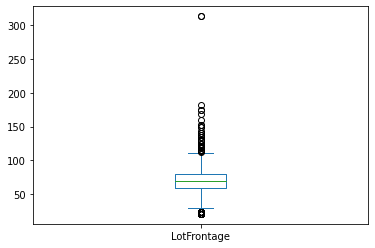

In [36]:
# LotFrontage
print('Number of missing values in column LotFrontage :', dataDf['LotFrontage'].isnull().sum())

dataDf['LotFrontage'].plot.box()

# Since there are outliers in this column, replace Null value with Median
median_val = dataDf['LotFrontage'].median()
print('Replace Null values with Median : ', median_val)
dataDf['LotFrontage'].fillna(median_val, inplace=True)

Number of missing values in column MasVnrArea : 8
Replace Null values with Median :  0.0


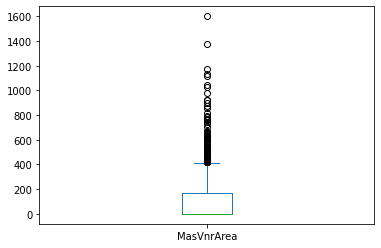

In [37]:
# MasVnrArea
print('Number of missing values in column MasVnrArea :', dataDf['MasVnrArea'].isnull().sum())

dataDf['MasVnrArea'].plot.box()

# Since there are outliers in this column, replace Null value with Median
median_val = dataDf['MasVnrArea'].median()
print('Replace Null values with Median : ', median_val)
dataDf['MasVnrArea'].fillna(median_val, inplace=True)

Number of missing values in column GarageAge : 81
Replace Null values with Mode :  0.0


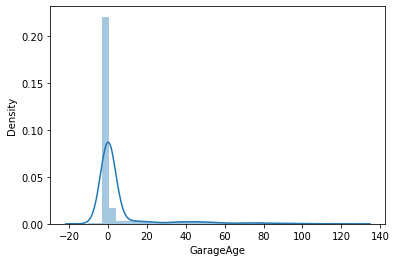

In [38]:
# GarageAge
print('Number of missing values in column GarageAge :', dataDf['GarageAge'].isnull().sum())

sns.distplot(dataDf['GarageAge'])

# Replace the missing and negative values with mode
mode_val = dataDf['GarageAge'].mode().iat[0]
print('Replace Null values with Mode : ', mode_val)
dataDf['GarageAge'].fillna(mode_val, inplace=True)
# dataDf['GarageAge'] = dataDf['GarageAge'].apply(lambda x: mode_val if x < 0 else x)

In [39]:
# Check if there are no columns with Null value
list(dataDf.columns[dataDf.isnull().any()])

# Observation
# All coulmns with missing values have been imputed

[]

## Step 5: Remove Outliers <a class="anchor" id="remove-outliers"></a>

In [40]:
# Generate descriptive statistics for all numerical columns
dataDf.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# Observation
# By looking at the descriptive statistics, it looks few columns contain outliers


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,HouseAge,HouseModAge,GarageAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,36.547945,13.597945,5.239726
std,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,30.250152,24.476465,16.163661
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-10.000000
10%,49.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,...,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,106475.000000,1.000000,0.000000,0.000000
20%,59.000000,7078.400000,5.000000,5.000000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,...,5.000000,0.000000,1.000000,295.600000,0.000000,0.000000,124000.000000,5.000000,0.000000,0.000000
30%,60.000000,8063.700000,5.000000,5.000000,0.000000,0.000000,280.000000,840.000000,915.700000,0.000000,...,6.000000,0.000000,1.000000,384.000000,0.000000,0.000000,135500.000000,11.000000,0.000000,0.000000
40%,68.000000,8793.400000,6.000000,5.000000,0.000000,218.600000,374.600000,910.000000,1000.200000,0.000000,...,6.000000,0.000000,2.000000,440.000000,0.000000,0.000000,147000.000000,24.000000,0.000000,0.000000
50%,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,35.000000,0.000000,0.000000
60%,70.000000,10198.200000,6.000000,5.000000,16.000000,525.600000,604.400000,1088.000000,1182.000000,455.400000,...,7.000000,1.000000,2.000000,516.000000,100.000000,40.000000,179280.000000,42.400000,1.000000,0.000000


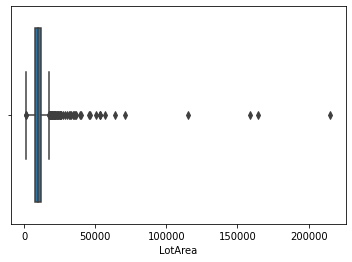

Max: 25251.619999999988


(1430, 48)

In [41]:
# LotArea
sns.boxplot(data=dataDf, x="LotArea")
plt.show()

# Remove values beyond 98%
maximum = dataDf["LotArea"].quantile(0.98)
print('Max:',maximum)
dataDf = dataDf[dataDf["LotArea"]<=maximum]
dataDf.shape

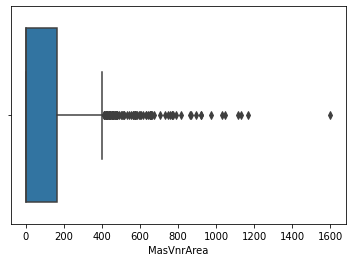

Max: 644.2000000000007


(1401, 48)

In [42]:
# MasVnrArea
sns.boxplot(data=dataDf, x="MasVnrArea")
plt.show()

# Remove values beyond 98%
maximum = dataDf["MasVnrArea"].quantile(0.98)
print('Max:',maximum)
dataDf = dataDf[dataDf["MasVnrArea"]<=maximum]
dataDf.shape


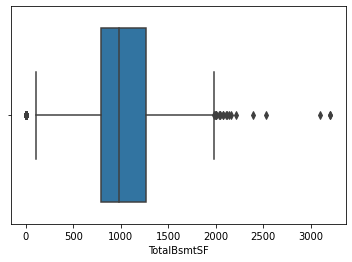

Max: 2033.0


(1387, 48)

In [43]:
# TotalBsmtSF
sns.boxplot(data=dataDf, x="TotalBsmtSF")
plt.show()

# Remove values beyond 99%
maximum = dataDf["TotalBsmtSF"].quantile(0.99)
print('Max:',maximum)
dataDf = dataDf[dataDf["TotalBsmtSF"]<=maximum]
dataDf.shape

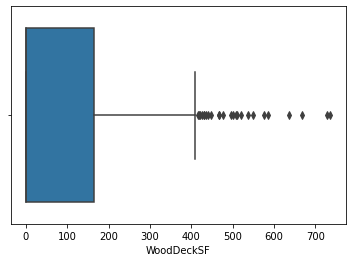

Max: 469.1200000000008


(1373, 48)

In [44]:
# WoodDeckSF
sns.boxplot(data=dataDf, x="WoodDeckSF")
plt.show()

# Remove values beyond 99%
maximum = dataDf["WoodDeckSF"].quantile(0.99)
print('Max:',maximum)
dataDf = dataDf[dataDf["WoodDeckSF"]<=maximum]
dataDf.shape

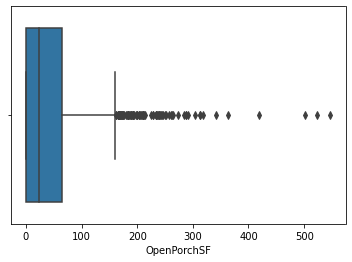

Max: 277.0799999999997


(1359, 48)

In [45]:
# OpenPorchSF
sns.boxplot(data=dataDf, x="OpenPorchSF")
plt.show()

# Remove values beyond 99%
maximum = dataDf["OpenPorchSF"].quantile(0.99)
print('Max:',maximum)
dataDf = dataDf[dataDf["OpenPorchSF"]<=maximum]
dataDf.shape


In [46]:
# Determine the percentage of data retained after removing outliers

data_retained = round(100*(len(dataDf)/1460),2)
print(data_retained)

93.08


## Step 6: Visualising the Data <a class="anchor" id="visualize_data"></a>

#### Visualize Target variable <a class="anchor" id="visualize_target_var"></a>

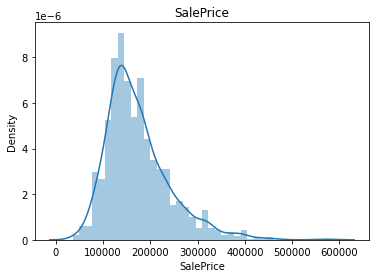

In [47]:
# Visualise the target variable
plt.title('SalePrice')
sns.distplot(dataDf['SalePrice'])
plt.show()

# Observation
# The target variable is left skewed

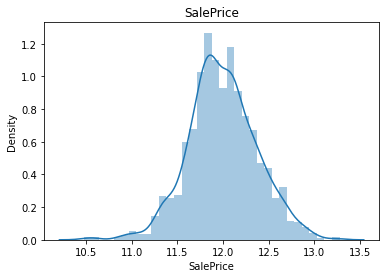

In [48]:
# Normalize the target variable by transferring to log
dataDf['SalePrice'] = np.log1p(dataDf['SalePrice'])

plt.title('SalePrice')
sns.distplot(dataDf['SalePrice'])
plt.show()

# Observation
# The target variable is normalized with some noise

#### Visualize Independent vs Target variable <a class="anchor" id="visualize-predictor-target-var"></a>

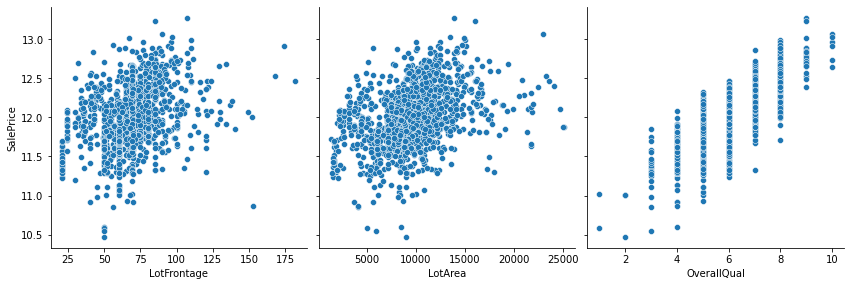

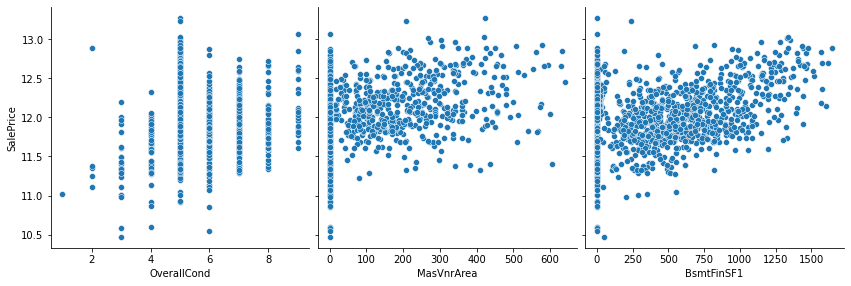

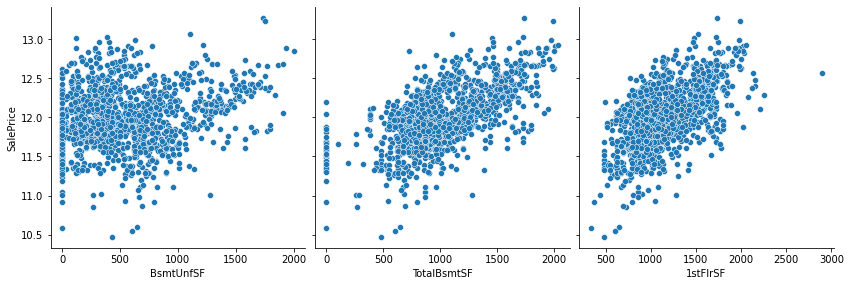

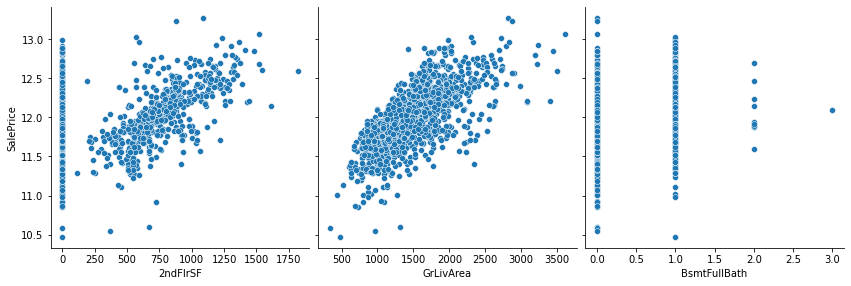

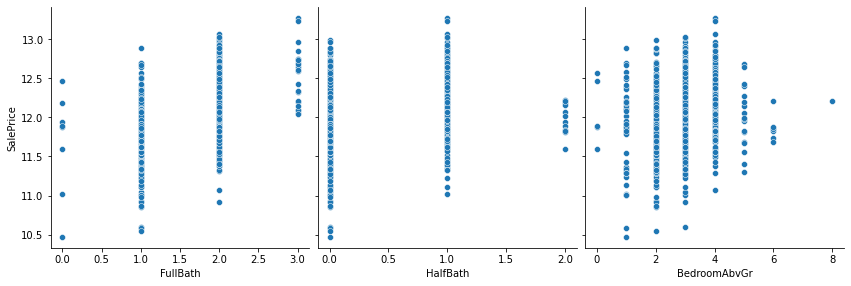

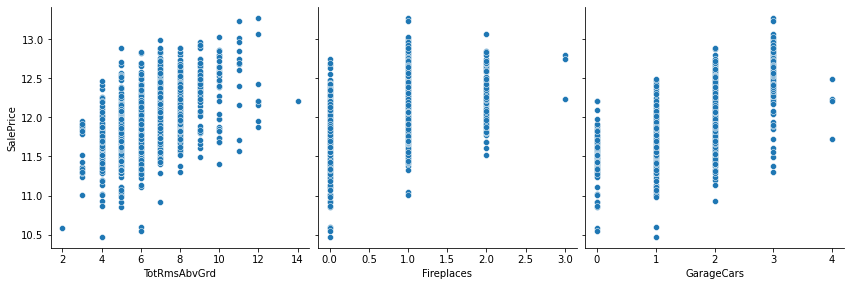

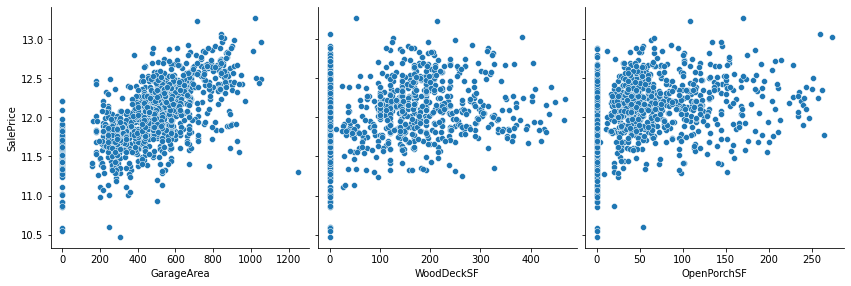

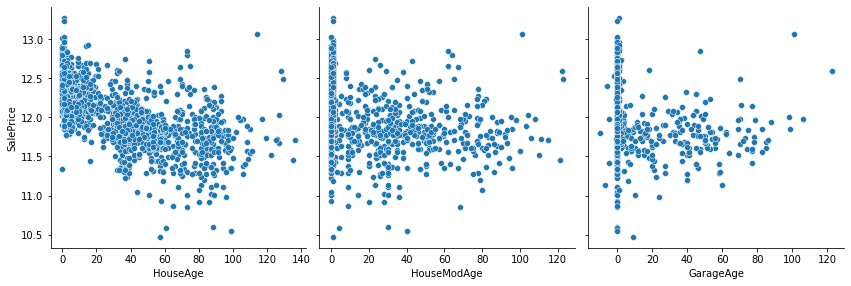

In [49]:
# Make a pairplot of all the numerical columns
numerical_col = list(dataDf.select_dtypes(include=['int64','float64']))
numerical_col.remove('SalePrice')

x_var = []
while len(numerical_col):
    x_var = numerical_col[:3]
    numerical_col = numerical_col[3:]
    sns.pairplot(dataDf, x_vars=x_var, y_vars='SalePrice',height=4, aspect=1,kind='scatter')
    plt.show()

# Observation
# We do see that linear behaviour exist between target variable and few of the independent variable
# Hence Linear Regression can be used!

#### Visualize correlation among variables <a class="anchor" id="visualize-correlation"></a>

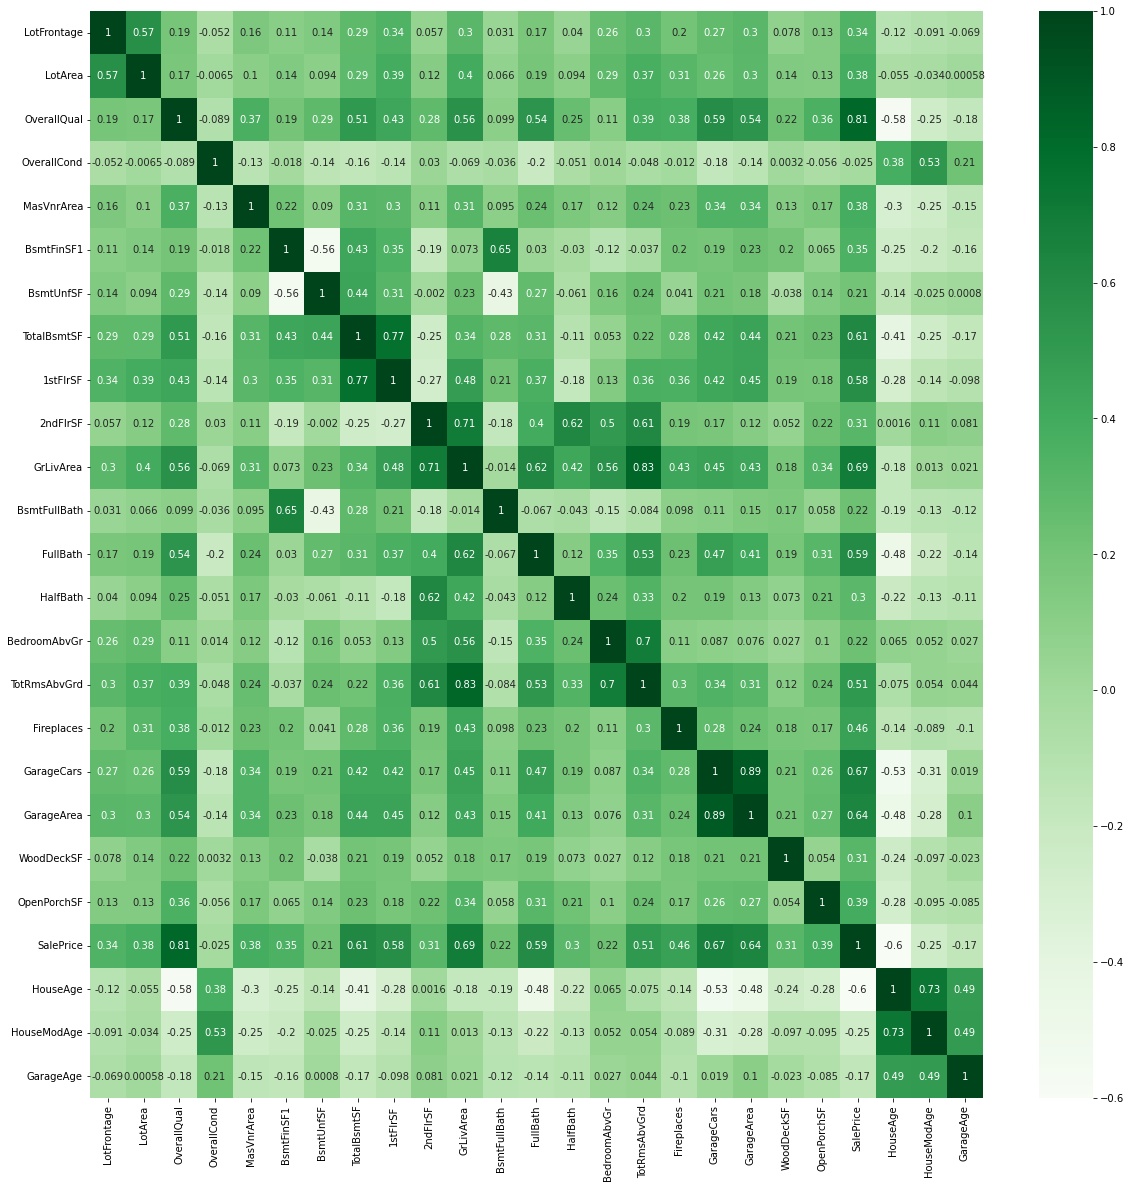

In [50]:
# Build heat map to view correlation among all numerical variables
plt.figure(figsize=(20,20))
sns.heatmap(data=dataDf.corr(), annot=True, cmap='Greens')
plt.show()

# Observation
# There are few features which are highly correlated and can be dropped.

In [51]:
# Removing following columns which shows high correlation
    # TotRmsAbvGrd and GrLivArea show 83%
    # Garage Area and Garage Cars show 89%
dataDf.drop(columns=['TotRmsAbvGrd','GarageArea'], inplace=True)
dataDf.shape

(1359, 46)

In [52]:
# Remove these columns from numerical_col list
del_col = ['TotRmsAbvGrd','GarageArea']
numerical_col = [col for col in numerical_col if col not in del_col]

## Step 7: Data Preparation <a class="anchor" id="data_preparation"></a>

#### Create Sequence for Ordered Categorical Variables <a class="anchor" id="create-sequence"></a>

In [53]:
dataDf['d_LotShape'] = dataDf['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
dataDf['d_ExterQual'] = dataDf['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
dataDf['d_BsmtQual'] = dataDf['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dataDf['d_BsmtExposure'] = dataDf['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
dataDf['d_BsmtFinType1'] = dataDf['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
dataDf['d_HeatingQC'] = dataDf['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dataDf['d_KitchenQual'] = dataDf['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dataDf['d_FireplaceQu'] = dataDf['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dataDf['d_GarageFinish'] = dataDf['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
dataDf['d_SaleCondition'] = dataDf['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0, 'None': 0})

dataDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_SaleCondition
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,3,4,4,1,6,5,4,0,2,1
1,1-STORY 1946 & NEWER,RL,80.0,9600,Reg,Others,Veenker,1Fam,1Story,6,...,3,3,4,4,5,5,3,3,2,1
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2,4,4,2,6,5,4,3,2,1
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,2,3,3,1,5,4,4,4,1,0
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,Others,NoRidge,1Fam,2Story,8,...,2,4,4,3,6,5,4,3,2,1


In [54]:
# Delete columns which have been converted into Sequence
dataDf.drop(columns=['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                    'KitchenQual', 'FireplaceQu', 'GarageFinish', 'SaleCondition'], inplace=True)
dataDf.shape

(1359, 46)

#### Create Dummy variables <a class="anchor" id="dummy-variables"></a>

In [55]:
# Get list of all categorical variables
categorical_data = dataDf.select_dtypes(include=['object'])
categorical_data.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,Fence
0,2-STORY 1946 & NEWER,RL,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,None
1,1-STORY 1946 & NEWER,RL,Others,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd,None
2,2-STORY 1946 & NEWER,RL,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,None
3,2-STORY 1945 & OLDER,RL,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Detchd,None
4,2-STORY 1946 & NEWER,RL,Others,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,None


In [56]:
# Create dummy for all categorical variables
categorical_dummies = pd.get_dummies(categorical_data, drop_first=True)
categorical_dummies.head()

,MSSubClass_1-1/2 STORY UNFINISHED,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER,MSSubClass_1-STORY PUD 1946 & NEWER,MSSubClass_2 FAMILY CONVERSION,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD 1946 & NEWER,MSSubClass_DUPLEX,MSSubClass_Others,...,Foundation_Others,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [57]:
# Delete all categorical coulmns from dataDf
dataDf.drop(columns=list(categorical_data.columns), inplace=True)
dataDf.shape

(1359, 33)

In [58]:
# Concat all the categorical dummies to dataDf
dataDf = pd.concat([dataDf, categorical_dummies], axis=1)
dataDf.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Foundation_Others,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,65.0,8450,7,5,196.0,706,150,856,856,854,...,0,1,0,0,0,0,0,0,0,1
1,80.0,9600,6,8,0.0,978,284,1262,1262,0,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,7,5,162.0,486,434,920,920,866,...,0,1,0,0,0,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,540,756,961,756,...,0,0,0,1,0,0,0,0,0,1
4,84.0,14260,8,5,350.0,655,490,1145,1145,1053,...,0,1,0,0,0,0,0,0,0,1


#### Create X and y sets for the model building <a class="anchor" id="create_x_y_sets"></a>

In [59]:
X = dataDf.drop(columns=['SalePrice'])
y = dataDf['SalePrice']

#### Rescaling Features <a class="anchor" id="rescaling_features"></a>

In [60]:
# storing column names in cols, since column names are lost after scaling
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns
X.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Foundation_Others,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
count,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,...,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03,1.359000e+03
mean,-1.921446e-16,4.705581e-17,-2.431217e-16,3.405011e-16,-5.228423e-17,-3.659896e-17,1.097969e-16,-3.529186e-17,1.973730e-16,6.666240e-17,...,4.182739e-17,3.267765e-18,4.182739e-17,5.685910e-17,6.796950e-17,3.855962e-17,1.568527e-17,-2.875633e-17,2.548856e-17,5.359134e-17
std,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,...,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00,1.000368e+00
min,-2.459853e+00,-2.250578e+00,-3.807453e+00,-4.095963e+00,-6.257160e-01,-1.014040e+00,-1.300765e+00,-2.690973e+00,-2.329595e+00,-7.977871e-01,...,-1.552886e-01,-8.759168e-01,-2.450763e-01,-6.161943e-01,-2.484326e-01,-1.552886e-01,-1.974609e-01,-3.548691e-01,-8.609819e-02,-2.031822e+00
25%,-4.512769e-01,-5.589458e-01,-7.766557e-01,-5.266051e-01,-6.257160e-01,-1.014040e+00,-7.917618e-01,-6.195645e-01,-7.704101e-01,-7.977871e-01,...,-1.552886e-01,-8.759168e-01,-2.450763e-01,-6.161943e-01,-2.484326e-01,-1.552886e-01,-1.974609e-01,-3.548691e-01,-8.609819e-02,4.921690e-01
50%,1.224071e-02,-5.304611e-02,-1.895642e-02,-5.266051e-01,-6.257160e-01,-1.244559e-01,-1.849178e-01,-1.281333e-01,-1.851658e-01,-7.977871e-01,...,-1.552886e-01,-8.759168e-01,-2.450763e-01,-6.161943e-01,-2.484326e-01,-1.552886e-01,-1.974609e-01,-3.548691e-01,-8.609819e-02,4.921690e-01
75%,4.757583e-01,5.077435e-01,7.387429e-01,3.657345e-01,4.512756e-01,6.578906e-01,5.570393e-01,6.182609e-01,6.508974e-01,9.097096e-01,...,-1.552886e-01,1.141661e+00,-2.450763e-01,1.622865e+00,-2.484326e-01,-1.552886e-01,-1.974609e-01,-3.548691e-01,-8.609819e-02,4.921690e-01
max,5.831962e+00,4.329298e+00,3.011841e+00,3.042753e+00,4.127902e+00,2.997618e+00,3.362965e+00,2.680422e+00,5.192041e+00,3.522643e+00,...,6.439623e+00,1.141661e+00,4.080362e+00,1.622865e+00,4.025237e+00,6.439623e+00,5.064293e+00,2.817941e+00,1.161465e+01,4.921690e-01


#### Splitting Data into Train and Test Sets <a class="anchor" id="train_test_set"></a>

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)

(951, 115)
(408, 115)


## Step 8: Building Linear Regression model <a class="anchor" id="build_linear_model"></a>

In [62]:
# Create an object of linear regression
lm = LinearRegression()

#### Select top 80 features using RFE

In [63]:
# # Run RFE with output number of variable equal to 100
# rfe = RFE(lm, n_features_to_select=60)
# rfe = rfe.fit(X_train, y_train)

# # Top 80 variables suggested by RFE
# col = X_train.columns[rfe.support_]
# print(col)

In [64]:
# Create new X with RFE for train and test data
# X_RFE_train = X_train[col]
# X_RFE_test = X_test[col]

In [65]:
# Fit the Linear model
lm.fit(X_train, y_train)

LinearRegression()

In [66]:
# Calculate metrics such as R2 score, RSS and RMSE
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 Train : ',r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 Test : ',r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train : ',rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test : ',rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train : ',mse_train_lr)
metric1.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test : ',mse_test_lr)
metric1.append(mse_test_lr)

r2 Train :  0.9285958528166327
r2 Test :  0.8895855319565709
RSS Train :  9.298033500805573
RSS Test :  6.743172359676938
MSE Train :  0.009777111988228783
MSE Test :  0.0165273832345023


## Step 9: Building Ridge Regression model <a class="anchor" id="ridge-model"></a>

In [67]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [69]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
ridge_alpha = 20
ridge = Ridge(alpha=ridge_alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.01243063  0.01749334  0.06375624  0.0413593   0.00310174  0.01744346
 -0.00763807  0.04675676  0.03239051  0.02847252  0.06191752  0.00956109
  0.01096151  0.01240876  0.00568134  0.00347096  0.02631233  0.01095004
  0.0097502  -0.06903462  0.01241098  0.00433438  0.00336167  0.00778221
  0.00012661  0.00899888  0.00848069  0.01449797  0.01518351  0.00731159
  0.00617145  0.01742441 -0.00602863 -0.00624283  0.00737057  0.0046466
 -0.00266989  0.00528281 -0.00033039 -0.00933807 -0.00669656  0.00476006
 -0.00419668 -0.00778791  0.01286933  0.00853876  0.00072966  0.00723346
  0.00090966 -0.00248778  0.00274085 -0.00297146 -0.00148247  0.02046136
 -0.01188015 -0.00436081 -0.01403801 -0.0197349  -0.00886275 -0.00468682
  0.0017657  -0.00380371  0.00431589  0.02329769 -0.0231506   0.00180465
 -0.00800175 -0.00443215  0.01860834  0.01416182  0.00252515  0.00131968
  0.00067078 -0.00669656 -0.01429173 -0.00886808 -0.00912695  0.00622831
  0.01539146 -0.00145184  0.0020052   0.01807841 -0.

In [70]:
# Calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 Train : ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 Test : ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train : ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test : ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train : ',mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test : ',mse_test_lr)
metric2.append(mse_test_lr)

r2 Train :  0.9279417198217818
r2 Test :  0.8913431537723173
RSS Train :  9.383212733945737
RSS Test :  6.635831835769827
MSE Train :  0.009866680056725275
MSE Test :  0.016264293715122124


## Step 10: Building Lasso Regression model <a class="anchor" id="lasso-model"></a>

In [71]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [73]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised
lasso_alpha = 0.001
lasso = Lasso(alpha=lasso_alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 1.20572092e-02  1.59651360e-02  6.98743903e-02  4.42331156e-02
  1.40438105e-03  2.22208017e-02 -3.86134343e-03  4.30941909e-02
  0.00000000e+00  0.00000000e+00  1.12901775e-01  8.85699315e-03
  4.46714905e-03  9.20435047e-03  2.88358322e-03  4.21576573e-03
  2.73955300e-02  1.06162069e-02  8.73291704e-03 -7.87969818e-02
  1.09151087e-02  1.57456079e-03  1.77902421e-03  6.06304453e-03
  0.00000000e+00  9.50499120e-03  6.88983155e-03  1.35342450e-02
  1.40821989e-02  6.92499606e-03  5.85818141e-03  1.86228087e-02
 -9.31583457e-04 -6.43795519e-03  2.74063847e-03 -0.00000000e+00
  0.00000000e+00  5.81208889e-03  0.00000000e+00 -1.07190701e-02
 -1.11514457e-02  3.96252417e-03  0.00000000e+00 -0.00000000e+00
  7.76231239e-03  0.00000000e+00  0.00000000e+00  5.82529558e-03
  6.96134902e-04 -0.00000000e+00  3.73268303e-03 -1.17261764e-03
  0.00000000e+00  2.08430778e-02 -6.96494658e-03 -1.71635243e-03
 -1.03343945e-02 -1.50362439e-02 -6.12025228e-03  0.00000000e+00
  2.44974018e-03 -0.00000

In [74]:
# Calculate metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 Train : ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 Test : ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train : ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test : ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train : ',mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test : ',mse_test_lr)
metric3.append(mse_test_lr)

r2 Train :  0.9267066439415765
r2 Test :  0.8950124686766904
RSS Train :  9.54404060407903
RSS Test :  6.41174143094727
MSE Train :  0.010035794536360703
MSE Test :  0.015715052526831544


## Step 11: Conclusion <a class="anchor" id="conclusion"></a>

#### Metrices

In [75]:
# Creating a table which contain all the metrics for Linear, Ridge and Lasso Regression
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
            'Linear Regression': metric1}
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.928596,0.927942,0.926707
1,R2 Score (Test),0.889586,0.891343,0.895012
2,RSS (Train),9.298034,9.383213,9.544041
3,RSS (Test),6.743172,6.635832,6.411741
4,MSE (Train),0.009777,0.009867,0.010036
5,MSE (Test),0.016527,0.016264,0.015715


#### Top 5 Predictor Variable

In [76]:
# Compute beta values for all Linear, Ridge and Lasso Regression
betas = pd.DataFrame(index=X_train.columns)
betas['Ridge'] = ridge.coef_.round(4)
betas['Lasso'] = lasso.coef_.round(4)

# Higher the co-efficient, higher is the significance of the variable
# Convert all the beta co-effecients to absolute value
betas_temp = betas
betas_temp = betas_temp.abs()

# Top 5 predictor variables in Ridge Regression
print('Top 5 Predictor variables in Ridge Regression')
sorted_betas = betas_temp.sort_values(by=['Ridge'], ascending=False)['Ridge']
index_value = list(sorted_betas.index)
index_value = index_value[:5]
print(betas.loc[index_value]['Ridge'])

# Top 5 predictor variables in Lasso Regression
print('Top 5 Predictor variables in Lasso Regression')
sorted_betas =betas_temp.sort_values(by=['Lasso'], ascending=False)['Lasso']
index_value = list(sorted_betas.index)
index_value = index_value[:5]
print(betas.loc[index_value]['Lasso'])

Top 5 Predictor variables in Ridge Regression
HouseAge      -0.0690
OverallQual    0.0638
GrLivArea      0.0619
TotalBsmtSF    0.0468
OverallCond    0.0414
Name: Ridge, dtype: float64
Top 5 Predictor variables in Lasso Regression
GrLivArea      0.1129
HouseAge      -0.0788
OverallQual    0.0699
OverallCond    0.0442
TotalBsmtSF    0.0431
Name: Lasso, dtype: float64


In [77]:
# Number of Zero co-efficients in Ridge and Lasso Regression
print('Number of Zero co-efficients in Ridge :',len(betas[betas['Ridge'] == 0]['Ridge']))
print('Number of Zero co-efficients in Lasso :',len(betas[betas['Lasso'] == 0]['Lasso']))

Number of Zero co-efficients in Ridge : 0
Number of Zero co-efficients in Lasso : 31


The optimal value of lambda are
- Ridge Regression : 20
- Lasso Regression : 0.001

The r2-score, RSS and MSE on train data is slightly better in Ridge compared to Lasso Regression.
However on test data Lasso is slightly better comapred to Ridge Regression.

Ridge regression considers all features whereas in Lasso Regression it reduces co-efficient of 31 variables to zero thus making the model simpler.

Top 5 predictor variables in Ridge Regression are
| Feature      |  Co-eff |
| -----------  | --------|
| HouseAge     | -0.0690 |
| OverallQual  |  0.0638 |
| GrLivArea    |  0.0619 |
| TotalBsmtSF  |  0.0468 |
| OverallCond  |  0.0414 |

The SalePrice of a house significantly depends on
(-0.0690) * HouseAge + 0.0638 * OverallQual + 0.0619 * GrLivArea + 0.0468 * TotalBsmtSF + 0.0414 * OverallCond

Top 5 predictor variables in Lasso Regression are
| Feature      |  Co-eff |
| -----------  | --------|
| GrLivArea    |  0.1129 |
| HouseAge     | -0.0788 |
| OverallQual  |  0.0699 |
| OverallCond  |  0.0442 |
| TotalBsmtSF  |  0.0431 |

The SalePrice of a house significantly depends on
0.1129 * GrLivArea + (-0.0788) * HouseAge + 0.0699 * OverallQual + 0.0442 * OverallCond + 0.0431 * TotalBsmtSF

## Assignment <a class="anchor" id="Assignment"></a>

#### Question 1 <a class="anchor" id="Question1"></a>

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ridge Model with double alpha

In [78]:
ridge = Ridge(alpha=ridge_alpha * 2)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.01232569  0.01748945  0.06233225  0.04032578  0.00304954  0.01932801
 -0.00421247  0.04197739  0.03457927  0.02744427  0.05716997  0.00963076
  0.01273299  0.01320621  0.00669554  0.00407884  0.02707469  0.01089707
  0.00990379 -0.05704464  0.00958442  0.00285525  0.00313051  0.00923431
  0.00323787  0.00956733  0.00928367  0.01514597  0.01681875  0.0077417
  0.00687334  0.0177631  -0.00557295 -0.00801571  0.00778636  0.00273535
 -0.00237173  0.00508965  0.0034691  -0.00940821 -0.00604231  0.00494038
 -0.00297707 -0.00592135  0.01054404  0.00527605  0.00076959  0.00703313
  0.00106111 -0.00199746  0.00323441 -0.00213913 -0.00013825  0.0205931
 -0.01107763 -0.00357088 -0.01352994 -0.0194631  -0.00766546 -0.00376357
  0.00178609 -0.00281677  0.00529319  0.02304368 -0.0212921   0.00176681
 -0.0073386  -0.00358572  0.01813634  0.01426664  0.00298768  0.00190544
  0.00011998 -0.00604231 -0.01196844 -0.00560737 -0.00801028  0.00516554
  0.01352944 -0.00093045  0.00199873  0.01652194 -0.0

In [79]:
# Calculate metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 Train : ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 Test : ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train : ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test : ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train : ',mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test : ',mse_test_lr)
metric2.append(mse_test_lr)

r2 Train :  0.9271531240564845
r2 Test :  0.8912556028955816
RSS Train :  9.48590130503807
RSS Test :  6.641178695312158
MSE Train :  0.009974659626748759
MSE Test :  0.016277398763019996


Lasso Model with double alpha

In [80]:
lasso = Lasso(alpha=lasso_alpha * 2)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 1.17883877e-02  1.59644122e-02  7.36366821e-02  4.51375529e-02
  1.05391180e-04  2.62864575e-02 -0.00000000e+00  3.97484161e-02
  0.00000000e+00  0.00000000e+00  1.16017127e-01  8.31924854e-03
  3.41501709e-03  7.54808307e-03  1.10652878e-03  4.41049542e-03
  2.92851904e-02  1.02473150e-02  8.56950367e-03 -6.86262922e-02
  4.47771044e-03  0.00000000e+00  0.00000000e+00  6.71967540e-03
  0.00000000e+00  9.15490628e-03  6.33315935e-03  1.31607872e-02
  1.53791830e-02  6.41736198e-03  6.61291224e-03  1.86578902e-02
 -0.00000000e+00 -6.38286664e-03  2.78869572e-03 -0.00000000e+00
 -0.00000000e+00  3.59962163e-03  0.00000000e+00 -1.06488707e-02
 -1.04266797e-02  1.53337335e-03  0.00000000e+00  0.00000000e+00
  8.86993063e-03 -0.00000000e+00  0.00000000e+00  4.55138098e-03
  0.00000000e+00 -0.00000000e+00  2.30251620e-03 -0.00000000e+00
  0.00000000e+00  2.00492454e-02 -6.06691612e-03 -2.99232485e-04
 -9.17986634e-03 -1.26723228e-02 -4.66471797e-03  0.00000000e+00
  1.13754870e-03 -0.00000

In [81]:
# Calculate metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 Train : ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 Test : ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train : ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test : ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train : ',mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test : ',mse_test_lr)
metric3.append(mse_test_lr)

r2 Train :  0.9247871340944476
r2 Test :  0.8966896048155892
RSS Train :  9.793993408891577
RSS Test :  6.309316284536292
MSE Train :  0.010298626087162541
MSE Test :  0.015464010501314442


In [82]:
# Creating a table which contain all the metrics for Ridge and Lasso Regression
rg_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
            'Ridge Regression': metric2}
rg_metric = pd.DataFrame(rg_table ,columns = ['Metric', 'Ridge Regression'] )
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric_q1 = pd.concat([rg_metric, ls_metric], axis = 1)
final_metric_q1

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.927153,0.924787
1,R2 Score (Test),0.891256,0.896690
2,RSS (Train),9.485901,9.793993
3,RSS (Test),6.641179,6.309316
4,MSE (Train),0.009975,0.010299
5,MSE (Test),0.016277,0.015464


Most important variable

In [83]:
# Compute beta values for Ridge and Lasso Regression
betas_q1 = pd.DataFrame(index=X_train.columns)
betas_q1['Ridge'] = ridge.coef_.round(4)
betas_q1['Lasso'] = lasso.coef_.round(4)

# Higher the co-efficient, higher is the significance of the variable
# Convert all the beta co-effecients to absolute value
betas_temp = betas_q1
betas_temp = betas_temp.abs()

# Top 5 predictor variables in Ridge Regression
print('Top 5 Predictor variables in Ridge Regression')
sorted_betas = betas_temp.sort_values(by=['Ridge'], ascending=False)['Ridge']
index_value = list(sorted_betas.index)
index_value = index_value[:5]
print(betas_q1.loc[index_value]['Ridge'])

# Top 5 predictor variables in Lasso Regression
print('Top 5 Predictor variables in Lasso Regression')
sorted_betas =betas_temp.sort_values(by=['Lasso'], ascending=False)['Lasso']
index_value = list(sorted_betas.index)
index_value = index_value[:5]
print(betas_q1.loc[index_value]['Lasso'])

Top 5 Predictor variables in Ridge Regression
OverallQual    0.0623
GrLivArea      0.0572
HouseAge      -0.0570
TotalBsmtSF    0.0420
OverallCond    0.0403
Name: Ridge, dtype: float64
Top 5 Predictor variables in Lasso Regression
GrLivArea      0.1160
OverallQual    0.0736
HouseAge      -0.0686
OverallCond    0.0451
TotalBsmtSF    0.0397
Name: Lasso, dtype: float64


#### Question 2 <a class="anchor" id="Question2"></a>

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [84]:
final_metric[['Metric', 'Ridge Regression', 'Lasso Regression']]

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.927942,0.926707
1,R2 Score (Test),0.891343,0.895012
2,RSS (Train),9.383213,9.544041
3,RSS (Test),6.635832,6.411741
4,MSE (Train),0.009867,0.010036
5,MSE (Test),0.016264,0.015715


In [85]:
# Number of Zero co-efficients in Ridge and Lasso Regression
print('Number of Zero co-efficients in Ridge :',len(betas[betas['Ridge'] == 0]['Ridge']))
print('Number of Zero co-efficients in Lasso :',len(betas[betas['Lasso'] == 0]['Lasso']))

Number of Zero co-efficients in Ridge : 0
Number of Zero co-efficients in Lasso : 31


Lasso as its metrices is almost equivalent to Ridge and it reduces co-efficients of 31 features to zero making model simpler

#### Question 3 <a class="anchor" id="Question3"></a>

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [86]:
# Top 5 predictor variables in Lasso Regression
betas_temp = betas
betas_temp = betas_temp.abs()

print('Top 5 Predictor variables in Lasso Regression')
sorted_betas =betas_temp.sort_values(by=['Lasso'], ascending=False)['Lasso']
index_value = list(sorted_betas.index)
index_value = index_value[:5]
print(betas.loc[index_value]['Lasso'])

Top 5 Predictor variables in Lasso Regression
GrLivArea      0.1129
HouseAge      -0.0788
OverallQual    0.0699
OverallCond    0.0442
TotalBsmtSF    0.0431
Name: Lasso, dtype: float64


In [87]:
# Delete top 5 predictor variabels from X_train
top_predictors = ['GrLivArea','HouseAge','OverallQual','OverallCond','TotalBsmtSF']
X_train_q3 = X_train.drop(columns=top_predictors)
X_train_q3.shape

(951, 110)

In [88]:
# Rebuild lasso model with new X_train
lasso = Lasso(alpha=lasso_alpha)

lasso.fit(X_train_q3, y_train)

# Compute beta values for Lasso Regression
betas_q3 = pd.DataFrame(index=X_train_q3.columns)
betas_q3['Lasso'] = lasso.coef_.round(4)

# Higher the co-efficient, higher is the significance of the variable
# Convert all the beta co-effecients to absolute value
betas_temp = betas_q3
betas_temp = betas_temp.abs()

# Top predictor variable in Lasso Regression
print('Top Predictor variable in Lasso Regression')
sorted_betas =betas_temp.sort_values(by=['Lasso'], ascending=False)['Lasso']
index_value = list(sorted_betas.index)
index_value = index_value[:5]
print(betas_q3.loc[index_value]['Lasso'])

Top Predictor variable in Lasso Regression
1stFlrSF         0.0982
2ndFlrSF         0.0924
BsmtFinSF1       0.0424
d_KitchenQual    0.0342
GarageCars       0.0332
Name: Lasso, dtype: float64


#### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

A model is said to be robust and generalisable only if 
- It performs well on unseen data. Performance on training data will not give concreate idea about how model will perform when exposed to unseen data.
- Overfitting of the model on the train data needs to be avoided i.e. model does well on train data but performs poorly on test data.
- The model should be simpler enough to understand the pattern. It should try to keep balance between bias and variance.

The metrices like r2-score, RSS and MSE gives us an idea about the accuracy of the model. However for model to be robust and generalisable, the difference between these metrices for train and test data should be very less.
